In [ ]:
# importing the necessary packages

In [1]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [2]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [3]:
# open image and display 
original = Image.open(requests.get('https://i.stack.imgur.com/MCRV7.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://i.stack.imgur.com/MCRV7.jpg', stream=True).raw)

In [4]:
# The file format of the source file.
print("Original image format :", original.format)
print("Tampered image format :", tampered.format)

#Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ", original.size)
print("Tampering image size : ", tampered.size)

Original image format : JPEG
Tampered image format : JPEG
Original image size :  (500, 339)
Tampering image size :  (500, 339)


In [5]:
#converting  the format of tampering image similar to original image 
original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering/image/original.png') #save image
tampered = tampered.resize((250, 160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png') #save image

(250, 160)
(250, 160)


In [6]:
# Extra code to change image format
tampered = Image.open('pan_card_tampering/image/tampered.png')
tampered.save('pan_card_tampering/image/tampered.png') # can do png to jpg

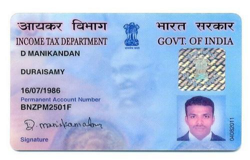

In [7]:
# display the original image
original 

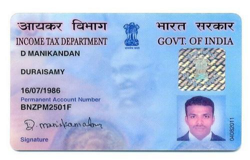

In [8]:
# Display the tampered image
tampered 

In [9]:
# comparing section start

In [10]:
# Load the two input images
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

In [11]:
# Convert the images to grayscale using opencv
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [12]:
# Compute the structural difference

(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 1.0


That means its 100% similar size to each other

In [13]:
# Calculating threshold and contours

In [14]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [15]:
# Loop over the contours

for c in cnts: 
  #applying contours on image
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x, y), (x+w, y+h), (0, 0, 255), 2)
  cv2.rectangle(tampered, (x, y), (x+w, y+h), (0, 0, 255), 2)

Original Format Image


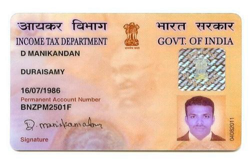

In [16]:
# Display original image with countour
print('Original Format Image')
Image.fromarray(original) 

Tampered Format Image


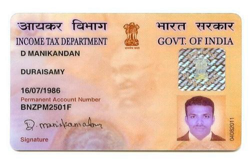

In [17]:
# Display Tampared image with countour 
print('Tampered Format Image')
Image.fromarray(tampered) 

Different Image


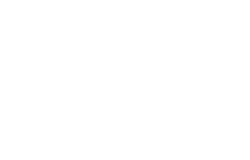

In [18]:
# Display difference image with black
#if there is difference we can see black portions otherwise not.

print('Different Image')
Image.fromarray(diff)

Threshold Image


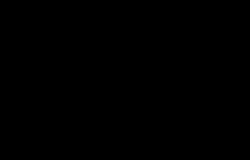

In [19]:
# Display threshold image with white
# if there is any diff we can see white mark
print('Threshold Image')
Image.fromarray(thresh)

So, There is no difference between those images